In [3]:
from pyhht import EMD
import numpy as np
import pyleoclim as pyleo
import matplotlib.pyplot as plt
%matplotlib inline

# Linear trend

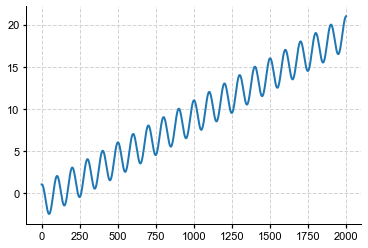

In [4]:
t = np.arange(2001)
f = 1/50
signal = 2*np.cos(np.pi*f*t)
slope = 0.01
intercept = -1
linear_trend = slope*t + intercept
signal_linear = signal+linear_trend
plt.plot(signal_linear)



# Linear Trend for Signal with noise

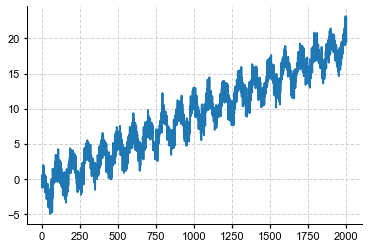

In [30]:
sig_var = np.var(signal)
noise_var = sig_var/ 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal_cos))
slope = 0.01
intercept = -1
signal_noise = signal+white_noise
linear_trend = slope*t + intercept
signal_linear_noise = signal_noise+linear_trend
plt.plot(signal_linear_noise)

# Decomposing using EMD

In [9]:
a =EMD(signal_linear).decompose()

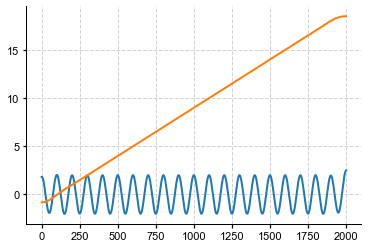

In [13]:
for i in a:
    plt.plot(i)

In [31]:
b = EMD(signal_linear_noise).decompose()

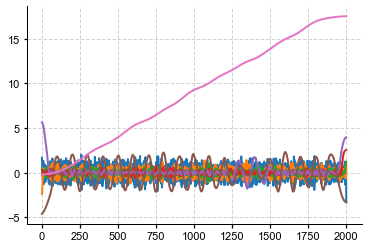

In [32]:
for i in b:
    plt.plot(i)

# Non Linear Trend

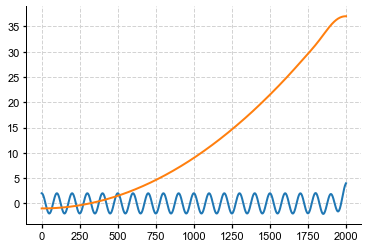

In [15]:
slope = 1e-5
intercept = -1
non_linear_trend = slope*t**2 + intercept
signal_non_linear = signal+non_linear_trend
b=EMD(signal_non_linear).decompose()
for i in b:
    plt.plot(i)

# Non Linear Trend for Noisy Signal

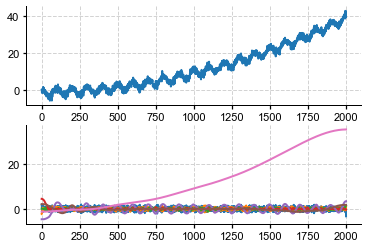

In [43]:
signal_non_linear_noisy_trend = signal_noise+non_linear_trend
plt.subplot(2,1,1)
plt.plot(signal_non_linear_noisy_trend)
d=EMD(signal_non_linear_noisy_trend).decompose()
plt.subplot(2,1,2)
for i in d:
    plt.plot(i)

# Cosine Trend

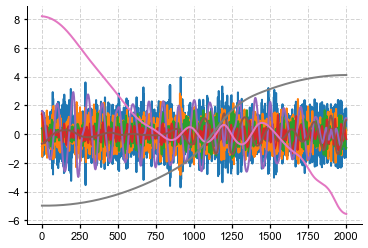

In [22]:
freq = 1/1500
signal2 = np.cos(2*np.pi*freq*t)
signal_cos = signal+3*signal2
sig_var = np.var(signal_cos)
noise_var = sig_var/ 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal_cos))
signal_cos = signal_cos+white_noise
c=EMD(signal_cos).decompose()
for i in c:
    plt.plot(i)

# S Shaped Trend

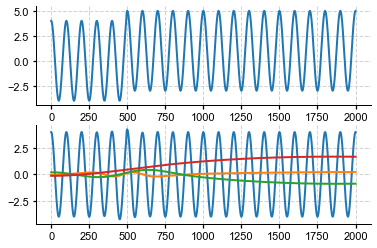

In [49]:
Y = t / ( t+ np.exp(500-1*t)) 
signal_s = signal+Y
plt.plot(signal_s)
signal_s = signal+signal_s
plt.subplot(2,1,1)

plt.plot(signal_s)
d=EMD(signal_s).decompose()
plt.subplot(2,1,2)
for i in d:
    plt.plot(i)
